### Essential Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

In [3]:
birth_death_rate_data = pd.read_csv('crude-birth-death-natural-increase-rates-by-ethnic-group-from-1971-onwards.csv')
graduate_salary_data = pd.read_csv('graduate-employment-survey-ntu-nus-sit-smu-suss-sutd.csv', encoding = 'latin-1')


### Singapore Birth Rate over the years


<AxesSubplot: xlabel='Year', ylabel='Mean Crude Birth Rate'>

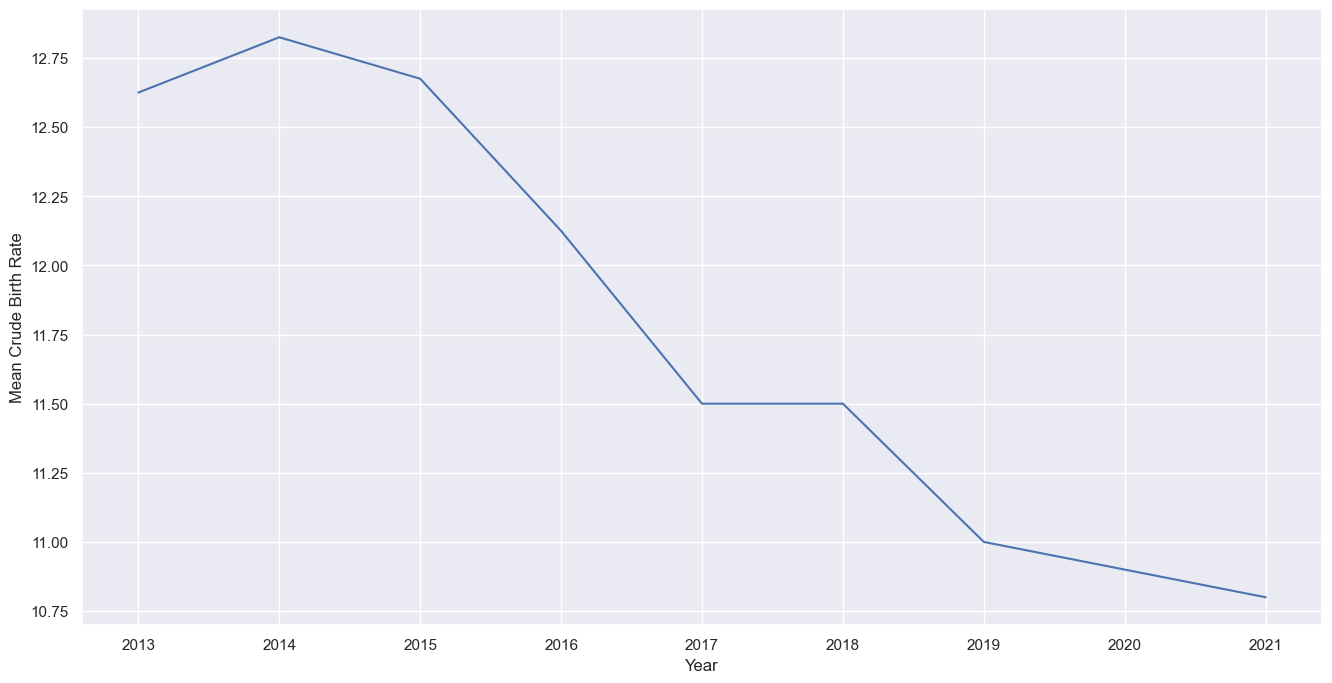

In [4]:
birth_rate = pd.DataFrame(birth_death_rate_data[['crude_birth_rate','year']])
birth_rate_above_2012 = birth_rate[birth_rate['year'] >= 2013]

mean_birth_rate_per_year = {}
for x in birth_rate_above_2012['year']:
    mean_birth_rate = birth_rate_above_2012.query('year == ' + str(x))['crude_birth_rate'].astype(float).mean()
    mean_birth_rate_per_year[x] = mean_birth_rate

df_mean_birth_rate_per_year = pd.DataFrame(mean_birth_rate_per_year.items(), columns=['Year', 'Mean Crude Birth Rate'])

f = plt.figure(figsize=(16, 8))
sb.lineplot(data = df_mean_birth_rate_per_year, x = 'Year', y = 'Mean Crude Birth Rate')

### Fresh Graduate Salary over the Years

{2013: 3254.883116883117, 2014: 3250.233009708738, 2015: 3358.0091743119265, 2016: 3431.119266055046, 2017: 3508.278260869565, 2018: 3567.198347107438, 2019: 3744.52, 2020: 3803.517985611511, 2021: 3934.6716417910447}


<AxesSubplot: xlabel='Year', ylabel='Mean Basic Salary'>

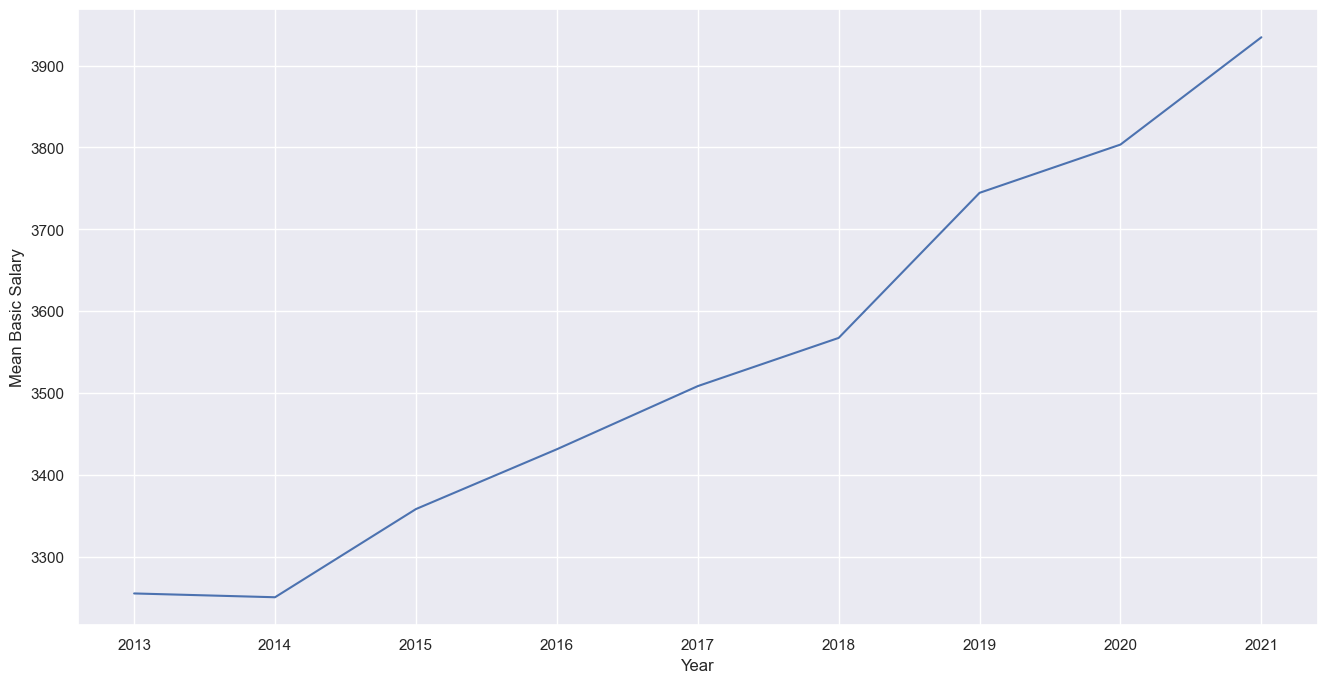

In [143]:
basic_salary_rate = pd.DataFrame(graduate_salary_data[['year','basic_monthly_mean']])
basic_salary_rate = basic_salary_rate[basic_salary_rate["basic_monthly_mean"].str.contains("na")==False]

mean_basic_salary_per_year = {}
for x in basic_salary_rate['year']:
    mean_basic_salary_rate = basic_salary_rate.query('year == ' + str(x))['basic_monthly_mean'].astype(int).mean()
    mean_basic_salary_per_year[x] = mean_basic_salary_rate

print(mean_basic_salary_per_year)

df_mean_basic_salary_per_year = pd.DataFrame(mean_basic_salary_per_year.items(), columns=['Year', 'Mean Basic Salary'])

f = plt.figure(figsize=(16, 8))
sb.lineplot(data = df_mean_basic_salary_per_year, x = 'Year', y = 'Mean Basic Salary')

### Displaying both Birth Rates and Graduate Salary from 2013 to 2021

(array([2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
        2021., 2022.]),
 [Text(2012.0, 0, '2012'),
  Text(2013.0, 0, '2013'),
  Text(2014.0, 0, '2014'),
  Text(2015.0, 0, '2015'),
  Text(2016.0, 0, '2016'),
  Text(2017.0, 0, '2017'),
  Text(2018.0, 0, '2018'),
  Text(2019.0, 0, '2019'),
  Text(2020.0, 0, '2020'),
  Text(2021.0, 0, '2021'),
  Text(2022.0, 0, '2022')])

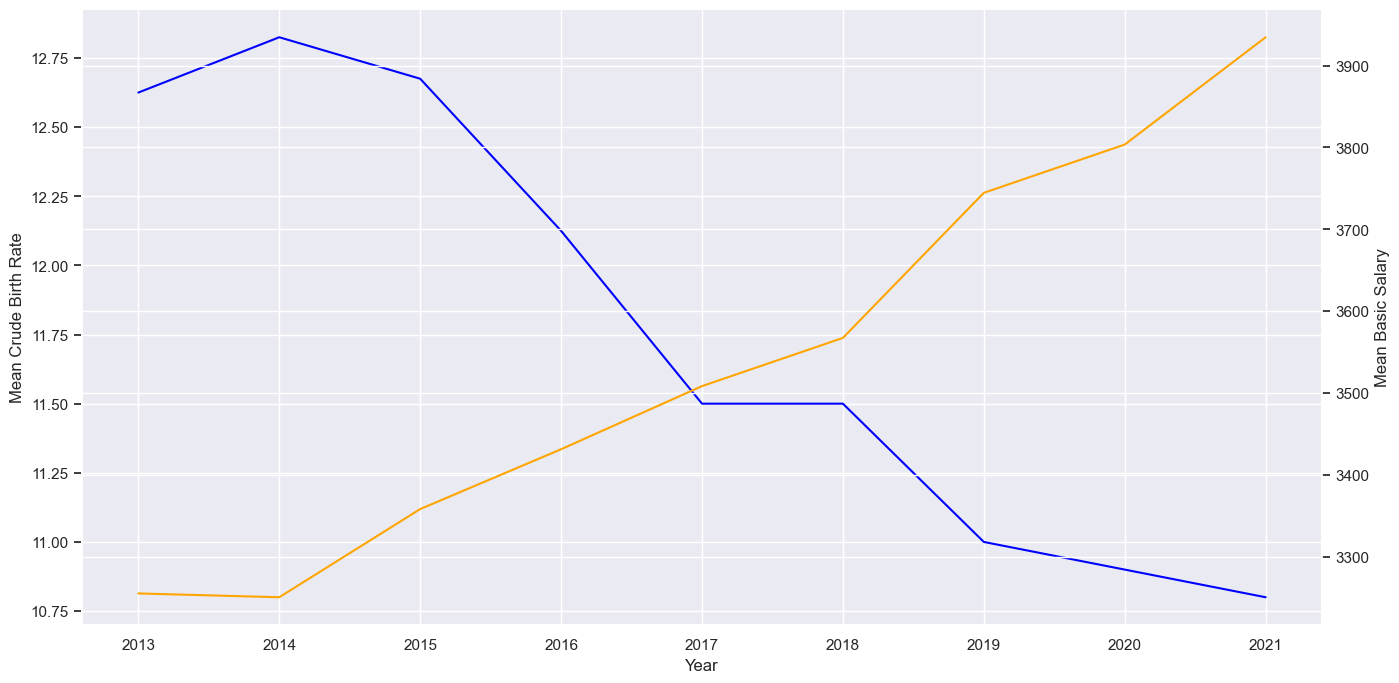

In [6]:
fig=plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
jointDF_birthRate_basicSalary = pd.merge(df_mean_birth_rate_per_year,df_mean_basic_salary_per_year, on = 'Year')

# changes here
sb.lineplot(x = 'Year', y = 'Mean Crude Birth Rate',data=jointDF_birthRate_basicSalary,color='blue',ax=ax1)
sb.lineplot(x = 'Year', y = 'Mean Basic Salary' ,data=jointDF_birthRate_basicSalary,color='orange',ax=ax2)

# and here
plt.xticks(rotation=60)

### Correlation Between Graduate Salary vs Birth Rate

<AxesSubplot: >

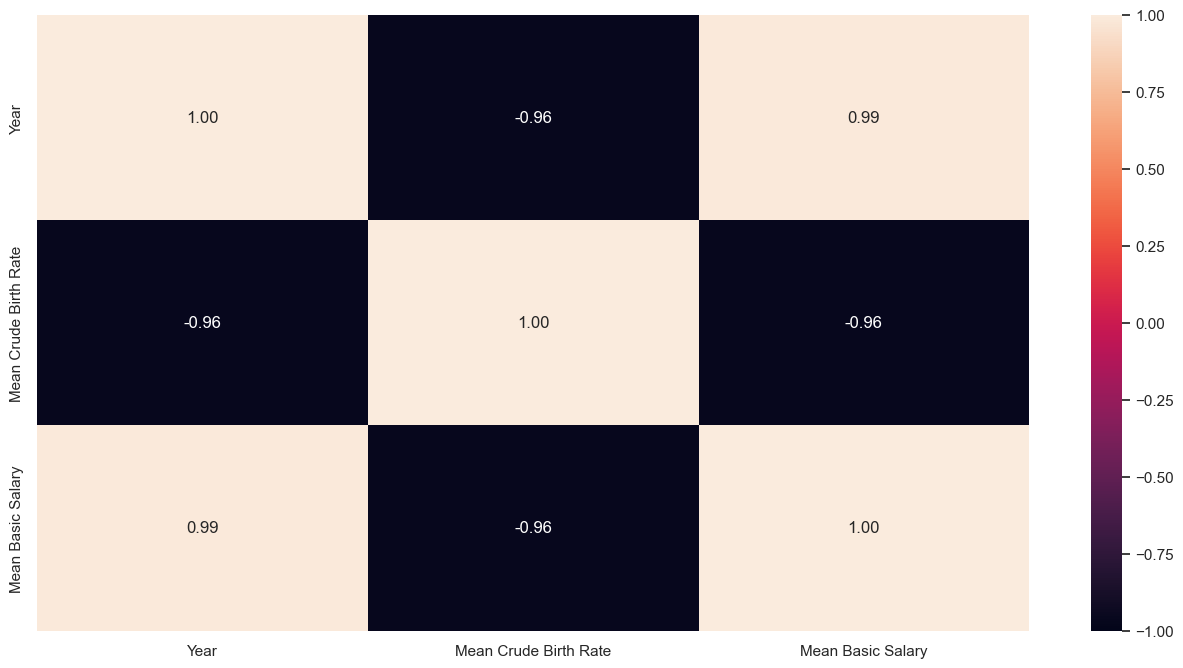

In [146]:
fig=plt.figure(figsize=(16,8))
sb.heatmap(jointDF_birthRate_basicSalary.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [8]:
jointDF_birthRate_basicSalary.corr()

,Year,Mean Crude Birth Rate,Mean Basic Salary
Year,1.000000,-0.962903,0.986401
Mean Crude Birth Rate,-0.962903,1.000000,-0.961479
Mean Basic Salary,0.986401,-0.961479,1.000000


### Increment in Graduate Gross Salary
This would mean that there is more overtime pay over the years.

(array([2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
        2021., 2022.]),
 [Text(2012.0, 0, '2012'),
  Text(2013.0, 0, '2013'),
  Text(2014.0, 0, '2014'),
  Text(2015.0, 0, '2015'),
  Text(2016.0, 0, '2016'),
  Text(2017.0, 0, '2017'),
  Text(2018.0, 0, '2018'),
  Text(2019.0, 0, '2019'),
  Text(2020.0, 0, '2020'),
  Text(2021.0, 0, '2021'),
  Text(2022.0, 0, '2022')])

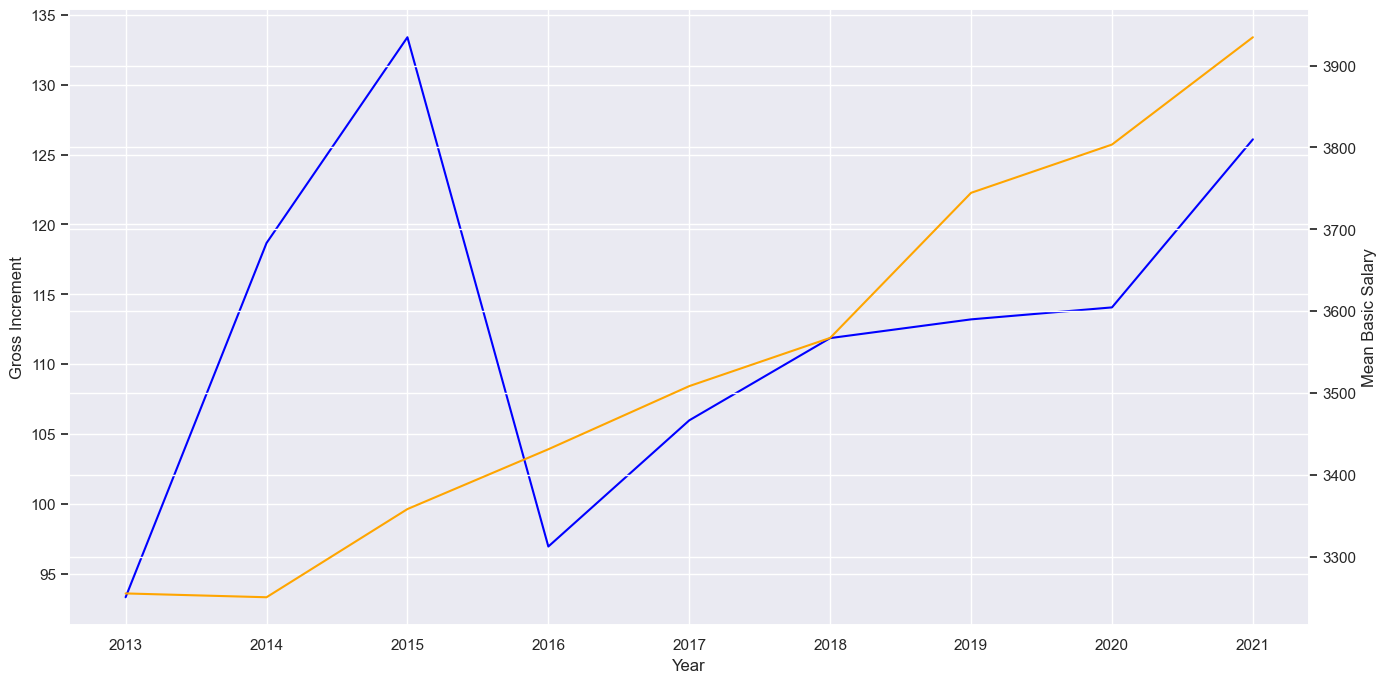

In [145]:
gross_salary_rate = pd.DataFrame(graduate_salary_data[['year','gross_monthly_mean']])
gross_salary_rate = gross_salary_rate[gross_salary_rate["gross_monthly_mean"].str.contains("na")==False]
mean_gross_salary_per_year = {}
for x in gross_salary_rate['year']:
     mean_gross_salary_rate = gross_salary_rate.query('year == ' + str(x))['gross_monthly_mean'].astype(int).mean()
     mean_gross_salary_per_year[x] =  mean_gross_salary_rate
#print( mean_gross_salary_per_year)

gross_increment_salary_per_year = {}
for x in  mean_gross_salary_per_year:
    gross_increment = ( mean_gross_salary_per_year[x] - mean_basic_salary_per_year[x])
    gross_increment_salary_per_year[x] = gross_increment
#print( gross_increment_salary_per_year)

df_gross_increment_salary_per_year = pd.DataFrame(gross_increment_salary_per_year.items(), columns=['Year', 'Gross Increment'])

fig=plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
jointDF_grossIncrement_meanSalary = pd.merge(df_gross_increment_salary_per_year,df_mean_basic_salary_per_year, on = 'Year')

# changes here
sb.lineplot(x = 'Year', y = 'Gross Increment',data=jointDF_grossIncrement_meanSalary,color='blue',ax=ax1)
sb.lineplot(x = 'Year', y = 'Mean Basic Salary' ,data=jointDF_grossIncrement_meanSalary,color='orange',ax=ax2)

# and here
plt.xticks(rotation=60)

In [10]:
jointDF_grossIncrement_birthRate = pd.merge(df_mean_birth_rate_per_year, df_gross_increment_salary_per_year, on = 'Year')
jointDF_grossIncrement_birthRate.corr()

,Year,Mean Crude Birth Rate,Gross Increment
Year,1.000000,-0.962903,0.326838
Mean Crude Birth Rate,-0.962903,1.000000,-0.116502
Gross Increment,0.326838,-0.116502,1.000000


### Birth Rate by Ethnic Groups from 2013 to 2021

ethnic_group  Chinese  Indians  Malays  Others
year                                          
2013              8.2     11.0    11.7    19.6
2014              8.8     10.8    12.4    19.3
2015              8.6     10.9    13.3    17.9
2016              8.2      9.9    13.5    16.9
2017              7.7      9.5    13.7    15.1
2018              7.5      9.2    14.1    15.2
2019              7.6      8.7    14.0    13.7
2020              7.2      8.3    14.2    13.9
2021              7.3      8.7    14.4    12.8


<AxesSubplot: xlabel='year'>

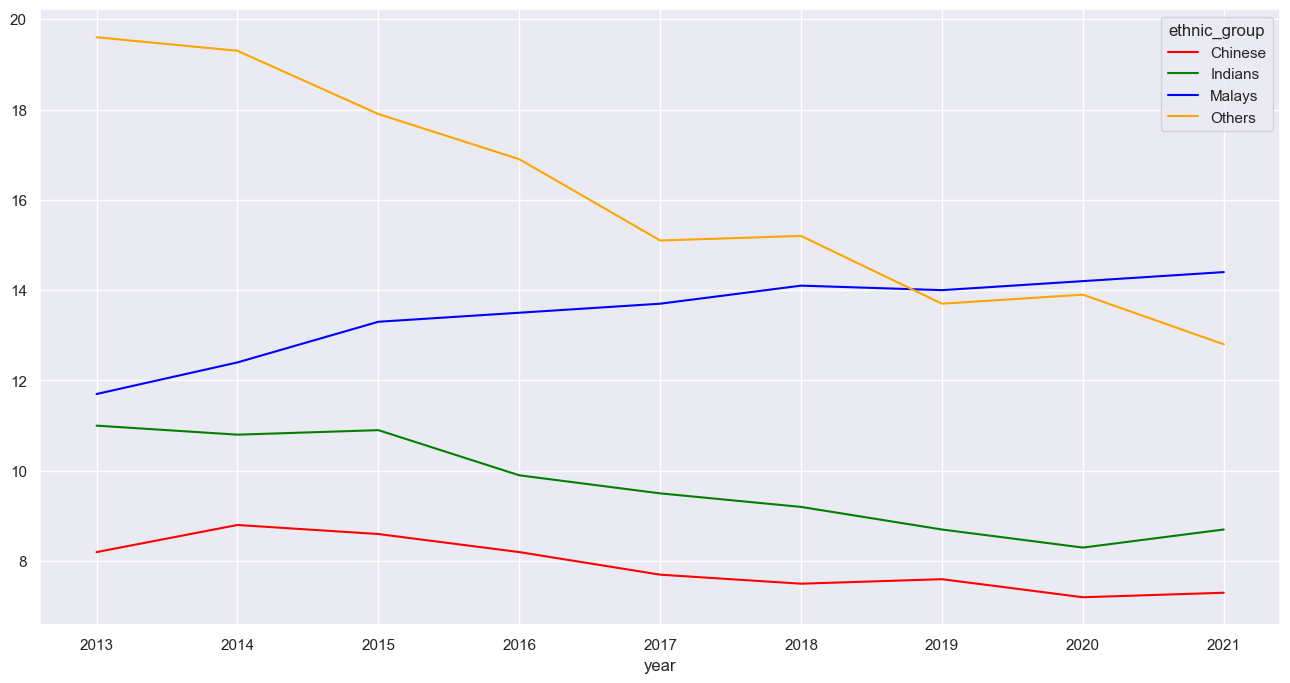

In [11]:
race_birth_rate = pd.DataFrame(birth_death_rate_data[['year', 'ethnic_group', 'crude_birth_rate']])
race_birth_rate_above_2012 = race_birth_rate[race_birth_rate['year'] >= 2013]

df_race_birth_rate_above_2012 = race_birth_rate_above_2012.pivot(index='year', columns='ethnic_group', values='crude_birth_rate')
print(df_race_birth_rate_above_2012)
df_race_birth_rate_above_2012.plot(color=['red', 'green', 'blue', 'orange'], figsize=(16, 8))

### Birth Rate by Ethnic Groups vs Graduate Salary

<AxesSubplot: xlabel='year', ylabel='crude_birth_rate'>

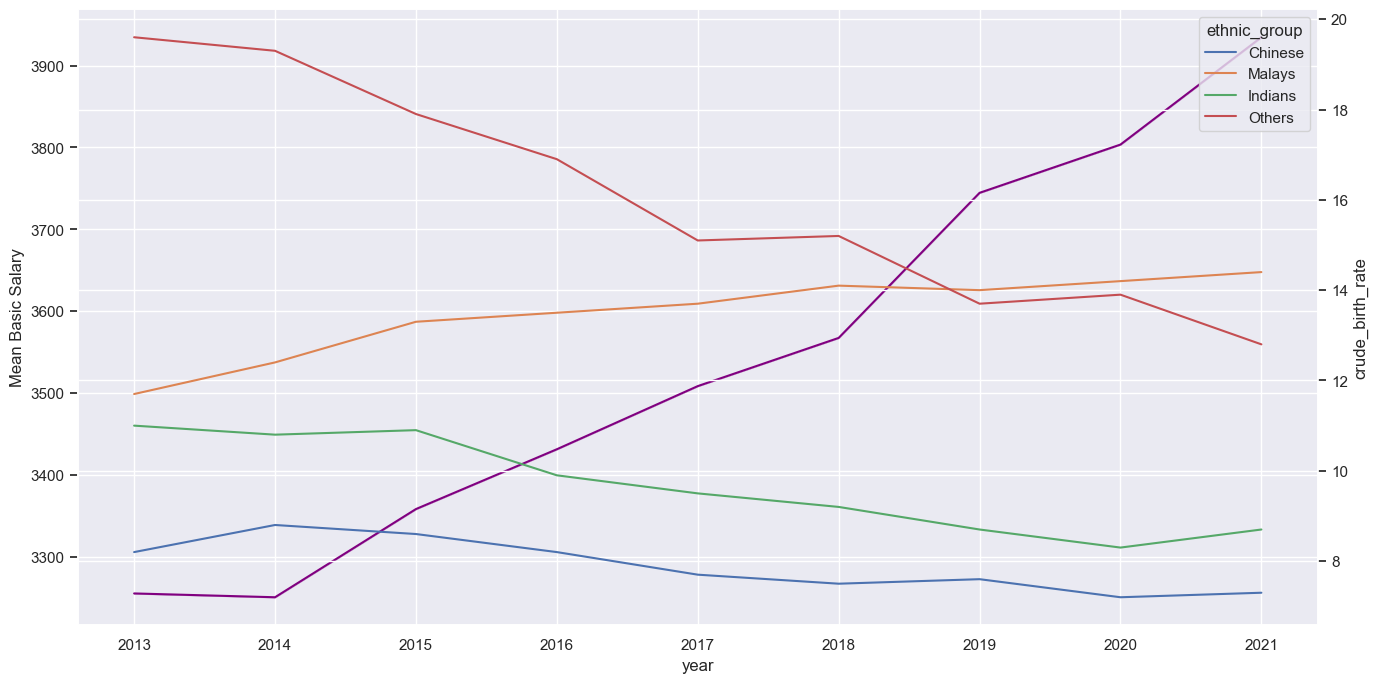

In [147]:
df2_mean_basic_salary_per_year = pd.DataFrame(mean_basic_salary_per_year.items(), columns=['year', 'Mean Basic Salary'])
# changes here
fig=plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

jointDF_birthRate_meanSalary = pd.merge(race_birth_rate_above_2012,df2_mean_basic_salary_per_year, on='year')

sb.lineplot(x = 'year', y = 'Mean Basic Salary' ,data=jointDF_birthRate_meanSalary,color='purple',ax=ax1)
sb.lineplot(x = 'year', y = 'crude_birth_rate',data=jointDF_birthRate_meanSalary,ax=ax2, hue='ethnic_group')

In [17]:
jointDF_birthRate_meanSalary.corr()

C:\Users\seank\AppData\Local\Temp\ipykernel_27360\2533237849.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  jointDF_birthRate_meanSalary.corr()


,year,crude_birth_rate,Mean Basic Salary
year,1.000000,-0.211655,0.986401
crude_birth_rate,-0.211655,1.000000,-0.211342
Mean Basic Salary,0.986401,-0.211342,1.000000
